In Unsupervised learning we don't know about our target variables. So, we try to find some kind of cluster of our datasets and make useful predictions out of it.

This documentation consists of three of the various Clustering Algorithms stating the contrast between in particular.

## 1. k-Means Clustering

Steps to perform it:


1) Suppose we have a dataset with data in it. So first we decide how many clusters we want to make. We pick any n(n is the number of clusters) random data points out of entire dataset. These n random points are called centroids of the clusters.

2) We calculate distance of all data points from the centroids and the points nearest to a particular centroid become part of that cluster to whose centroid they are nearest to.

3) Centre of gravity of the clusters is found and their respective centroids are modified or re-located to those centre of gravity positions.

4) Process of calculating distances from centroids,modifying cluster and adjusting  centroids is done repeatedly until there is no further change in any of the cluster points and the centroids.

The k in k-means is a free parameter which we denotes how many number of clusters we want to distribute our data into. So this needs to be specified to the algorithm beforehand.


But how do we know what can be an apt value of k?

Here comes the Elbow Method to help us.

In this method, we calculate SSE(Sum of sqaured errors) which is the sum of sqaures of distances of each point in a cluster from the centroid of that cluster.

Total SSE is the sum of all SSEs correponding to the different clusters.

Plot of SSE vs k-values is drawn where it is observed that as k increases SSE decreases. An elbow shape is located in the plot. The particular value of k with elbow in graph works as a good value of k.


In [ ]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [ ]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [ ]:

x.shape


(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
#bringing all features to a comparable scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

In [ ]:

kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x_scaled)

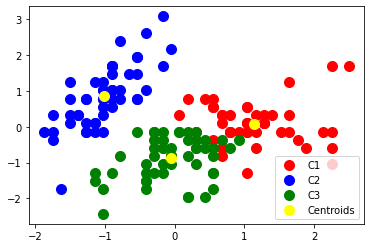

In [ ]:
plt.scatter(x_scaled[y_kmeans == 0,0],x_scaled[y_kmeans == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmeans == 1,0],x_scaled[y_kmeans == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmeans == 2,0],x_scaled[y_kmeans == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

In [ ]:
k_rng = range(1,10)
sse = []   #SSE array
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)


Inertia measures how well a dataset was clustered by K-Means.
It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares
across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

Text(0, 0.5, 'SSE')

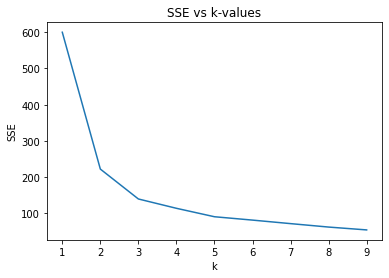

In [ ]:
elb = plt.plot(k_rng,sse)
plt.title('SSE vs k-values')
plt.xlabel('k')
plt.ylabel('SSE')


It is evident from the plot above that we see elbow at k= 3 which we deicided to mention to our algorithm beforehand. Hence, for this dataset k=3 is the most appropriate value for clustering by k-Means.

## 2. k-Medoids Clustering

k-Medoids Clustering is an improvement over k-Means Clustering.

The k-Means algorithm makes use of euclidian distance to finally make clusters by optimising/minimising the distances.

However,the error we try to minimize while using the K-means Algorithm is quadratically proportional to the distance. Hence,this affects the clustering badly with outliers.



The k-Medoids uses the first Norm to compute the distance where the error is linear proportional to the distance. That's why, in this case, our clusters are not affected much by outiers.

In [ ]:
!pip install scikit-learn-extra #Installing sklearn_extra


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:

kMedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)


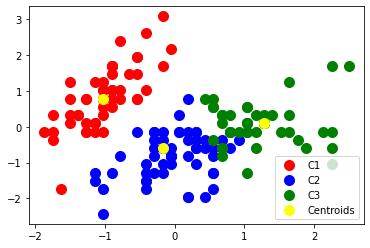

In [ ]:
plt.scatter(x_scaled[y_kmed == 0,0],x_scaled[y_kmed == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmed == 1,0],x_scaled[y_kmed == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmed == 2,0],x_scaled[y_kmed == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kMedoids.cluster_centers_[:,0],kMedoids.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

The above plot is using k-Medoids for clustering where we hardly see any difference from the plot made using k-Means as of now.

### Adding Outliers/Extreme Values

#### Highlighting Contrast Between k-Means and k-Medoids using visulaization

In [ ]:
import numpy as np
m = np.append(x,[[10,10,10,10],[15,15,15,15],[12,12,12,12]],axis=0)
m.shape
#making no of rows same in m and y
y = np.append(y,[2,2,2])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:

m.shape

(153, 4)

In [ ]:

y.shape


(153,)

In [ ]:
scaler = StandardScaler().fit(m)
x_scaled = scaler.transform(m)

In [ ]:
#Performing k-Means clustering with outliers
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x_scaled)

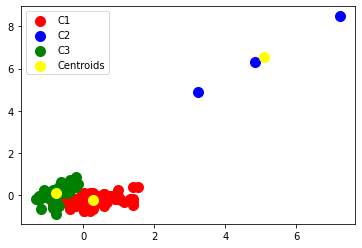

In [ ]:
plt.scatter(x_scaled[y_kmeans == 0,0],x_scaled[y_kmeans == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmeans == 1,0],x_scaled[y_kmeans == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmeans == 2,0],x_scaled[y_kmeans == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

Here ,we can see the three extreme values have formed their own clusters and the one of the centroids is deviated towards them, which has really distorted our cluster.

In [ ]:
#Performing k-Medoids clustering 

kMedoids = KMedoids(n_clusters=3).fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

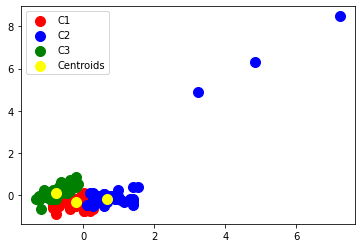

In [ ]:
plt.scatter(x_scaled[y_kmed == 0,0],x_scaled[y_kmed == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmed == 1,0],x_scaled[y_kmed == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmed == 2,0],x_scaled[y_kmed == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kMedoids.cluster_centers_[:,0],kMedoids.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

Now, here we see that those outliers haven't actually affected the clusters much. Rather,they have been classified into a cluster. The centroids are also not distorted. This is the evidence of advantage of k-Medoids over k-Means.

Now, in k-Medoids there is a concept of Silhouette Score. The image below will state about it Silhouette coefficient S(i).

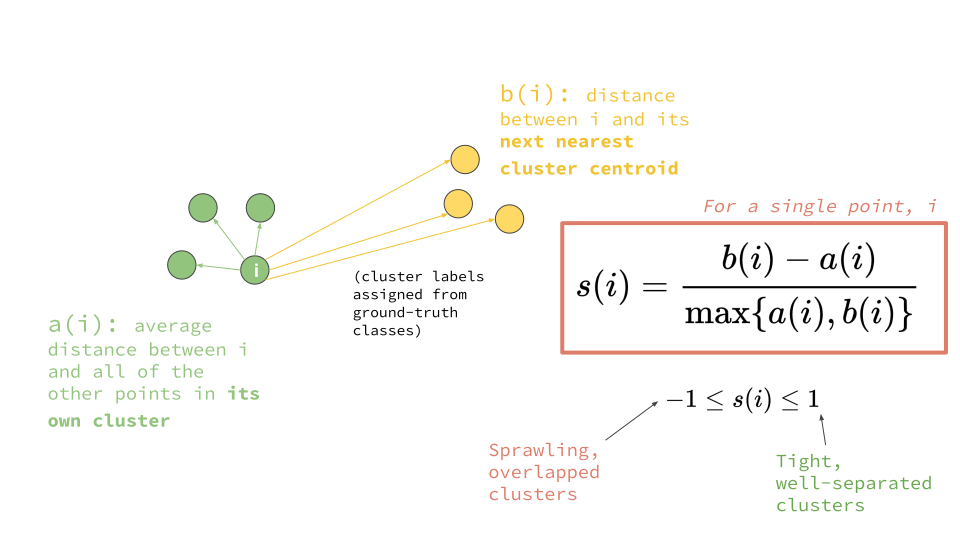

In [ ]:
#Calculating average Silhouette score for our k-Medoid cluster
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled,y_kmed)
print(silhouette_avg)

0.4008474335364915


In [ ]:
#silhouette score for each clusters
sample_silhouette_values = silhouette_samples(x_scaled,y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.5885837287178595
-0.09076616893476869
0.720634559021607


In [ ]:
sw = []   #Silhouette width

for i in range(2,11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled,y_kmed)
    sw.append(silhouette_avg)

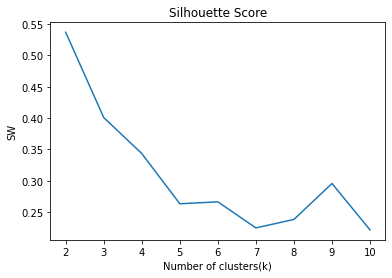

In [ ]:
#silhouette width is populated for different values of clusters
plt.plot(range(2,11),sw)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters(k)')
plt.ylabel('SW') 
plt.show()

Here, we see elbow at k= 3. That's why k=3 is a good cluster number according to Silhouette Concept as well.

## 3. Hierarchical Clustering

It is of two types:

#### a)Agglomerative

In this, we assign each data point as an individual cluster. Suppose we have 1000 data points. We will assign each of these points to a cluster and hence will have 1000 clusters in the beginning.

Then, one by one, we merge the closest pair of clusters and repeat this step until only a single cluster is left.

Since,we merge clusters at each step, it has got its name so.


#### b)Divisive

All data points are included in same cluster in the beginning.

Step by step,we split the farthest point in the cluster and repeat this process until each cluster only contains a single point.

In Hierarchical Clustering, we have the concept of Proximity Matrix.

It is a square matrix in which the entry in cell (j, k) is some measure of the similarity (or distance) between the items to which row j and column k correspond.It's left diagonal elements are 0.

### How to Choose the Number of Clusters in Hierarchical Clustering?

This is done with the help of Dendrogram,a tree-like diagram that records the sequences of merges or splits.

In [ ]:

from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

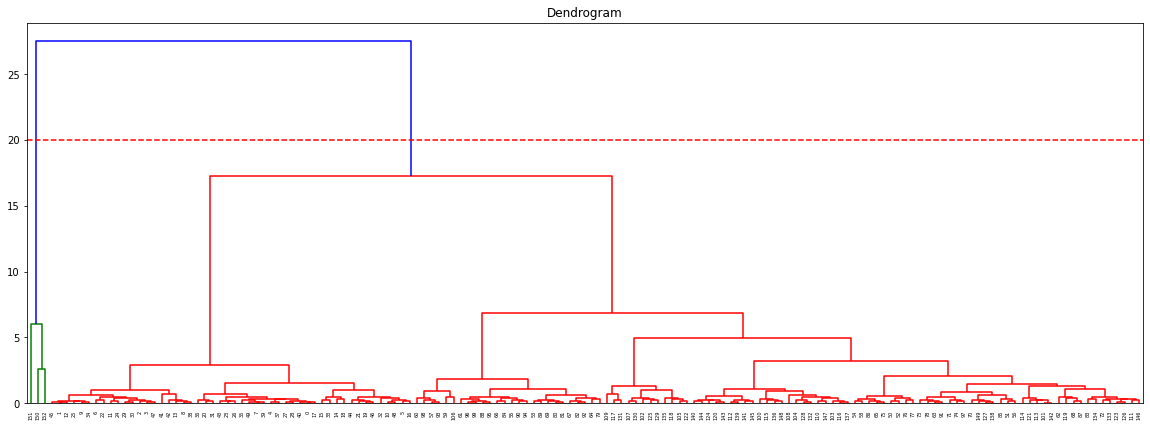

In [ ]:

from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt
Z= linkage(x_scaled,'ward') 
plt.figure(figsize=(20,7)) 
dn = dendrogram(Z)

plt.title('Dendrogram')
plt.axhline(y=20, color='r', linestyle='--')
plt.show()


The dendrogram above shows clearly that closest data form cluster in 1st step. The higher levels show how the clustering is modified at each step. 

We have also set the threshold in such a way that it cuts the tallest vertical line(here, at 6). The number of lines threshold line cuts is our number of clusters.

It is 2 as we can see in dendrogram.

In [ ]:
model = AgglomerativeClustering(linkage="single")
model = model.fit(x_scaled)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

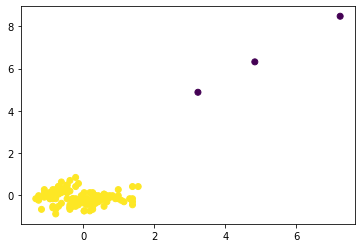

In [ ]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=model.labels_)

We can see 2 clusters in scatter plot generated as per Hierarchical Clustering.

### Difference in Hierarchical and Non-Hierarchical Clustering(consisting of k-Means and k-Medoids) 



*   In Hierarchical Clustering, clusters are overlapped and merged or   divided at continuous steps maintaing a hierarchy, however, there is no such overlapping of clusters or hierarchy in k-Means or k-Medoids algorithms.
*   Non-Hierarchical algorithms are faster,easy to understand and read,stable as compared to Hierarchical. Non-Hierarchical work better even when dataset involves some errors.





### Acknowledgements

https://scikit-learn.org/stable/  
https://www.platform.ai/     for image of Silhouette coefficient
